## Our Big Fat Greek Movie Analysis

First, we start by importing the necessary packages.

In [1]:
import pandas as pd
import sqlite3
import gzip
import shutil
import math
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to get columns not in scientific notation.
pd.options.display.float_format = '{:.4f}'.format

Next, we connect to the sqlite3 database.

In [3]:
conn = sqlite3.connect('unzippedData/im.db')

In [4]:
# unzip the imdb

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

Now load and check out the head of each CSV files to ensure they loaded properly.

In [5]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0000,664300000,2010
3,Inception,WB,292600000.0000,535700000,2010
4,Shrek Forever After,P/DW,238700000.0000,513900000,2010


In [6]:
movie_info = pd.read_csv('unzippedData/rt.movie_info.tsv', sep = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding='latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
movies = pd.read_csv('unzippedData/tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.5330,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.7340,2010-03-26,How to Train Your Dragon,7.7000,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.5150,2010-05-07,Iron Man 2,6.8000,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.0050,1995-11-22,Toy Story,7.9000,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.9200,2010-07-16,Inception,8.3000,22186


In [9]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's look at the SQL database, specifically at the movie_basics and movie_ratings tables.

In [10]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)

In [11]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)

In [12]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0000,"Comedy,Drama,Fantasy"


In [13]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Let's change the production budget, domestic gross, and worldwide gross fields to floats. 

In [15]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [16]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0000,760507625.0000,2776345279.0000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0000,241063875.0000,1045663875.0000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0000,42762350.0000,149762350.0000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0000,459005868.0000,1403013963.0000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0000,620181382.0000,1316721747.0000


Let's create a profit column (worldwide gross - production budget). 

In [17]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [18]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0000,760507625.0000,2776345279.0000,2351345279.0000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0000,241063875.0000,1045663875.0000,635063875.0000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0000,42762350.0000,149762350.0000,-200237650.0000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0000,459005868.0000,1403013963.0000,1072413963.0000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0000,620181382.0000,1316721747.0000,999721747.0000


Let's look at the entire movie budget dataframe in a pairplot to see if there are any obvious correlations.

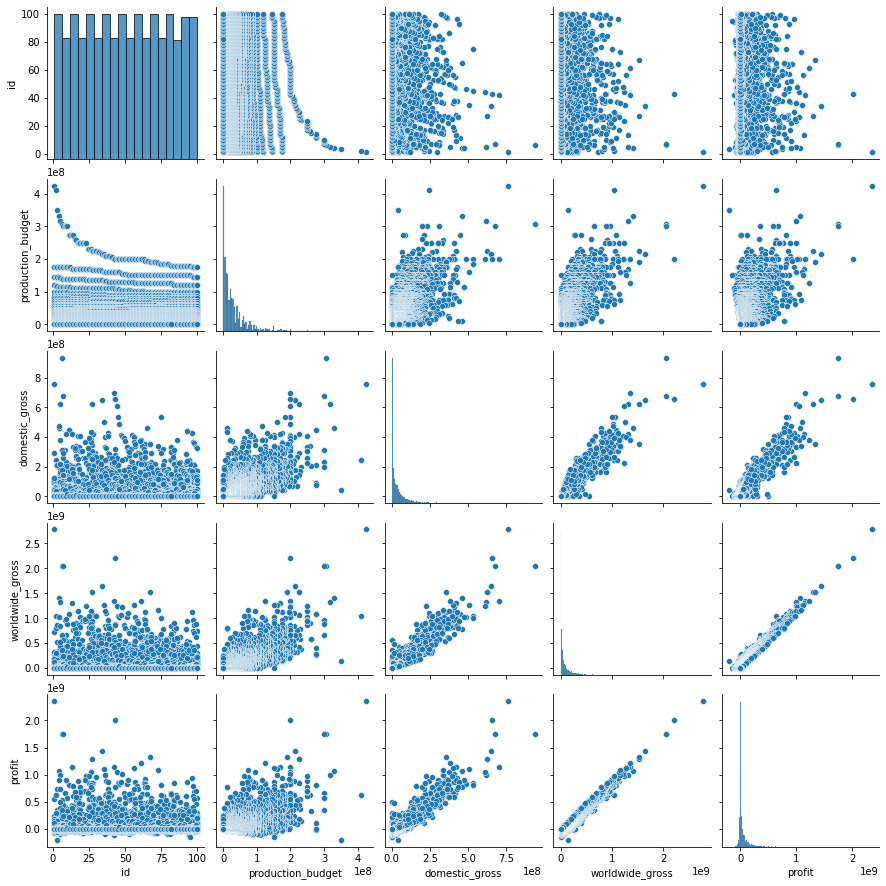

In [19]:
sns.pairplot(movie_budgets)

Looks like a slight positive correlation bewteen worldwide gross and production budget, and between production budget and profit. There's a definite positive correlation between worldwide gross and profit. Zoomed in graphs below.

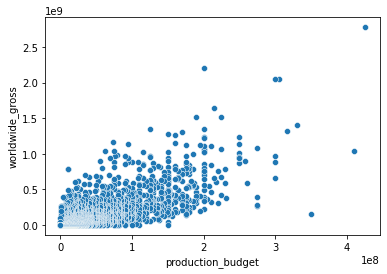

In [20]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='worldwide_gross');

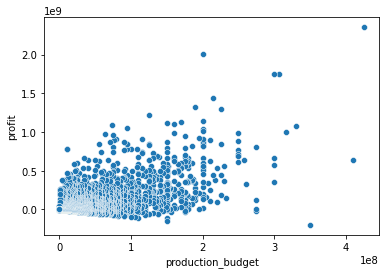

In [21]:
sns.scatterplot(data=movie_budgets, x='production_budget', y='profit');

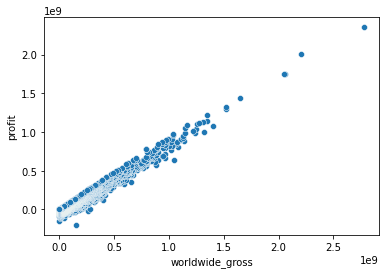

In [22]:
sns.scatterplot(data=movie_budgets, x='worldwide_gross', y='profit');

### Analysis using the Kaggle dataset

After analyzing the given datasets, we decided to look for a more robust dataset. From here on out, we are using the IMDB dataset from Kaggle, linked here: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset

In [23]:
imdb_movies = pd.read_csv('unzippedData/imdb_movies.csv')
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,271616668.0000,AU
1,Avatar: The Way of Water,12/15/2022,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,2316794914.0000,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0000,724459031.0000,AU
3,Mummies,01/05/2023,70.0000,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0000,34200000.0000,AU
4,Supercell,03/17/2023,61.0000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0000,340941958.6000,US


Let's convert the release date into datetime format so it's more usable.

In [24]:
imdb_movies['date_x'] = pd.to_datetime(imdb_movies['date_x'])

Drop all movies that are in post production or in production status. We only want to look at released movies. 

In [25]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['status'] != " Released"].index, inplace=True)

In [26]:
# confirm it worked
imdb_movies['status'].value_counts()

 Released    10131
Name: status, dtype: int64

In [27]:
# look at the head to see what it looks like now
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,271616668.0000,AU
1,Avatar: The Way of Water,2022-12-15,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,2316794914.0000,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0000,724459031.0000,AU
3,Mummies,2023-01-05,70.0000,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0000,34200000.0000,AU
4,Supercell,2023-03-17,61.0000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0000,340941958.6000,US


Let's split up the genres into separate columns so we can analyze by genre. 

In [28]:
imdb_movies['genre'].value_counts()

Drama                                                             556
Comedy                                                            372
Drama, Romance                                                    268
Horror                                                            259
Horror, Thriller                                                  199
                                                                 ... 
Drama, Romance, Western                                             1
Family, Animation, Fantasy, Music, Comedy, Adventure                1
Fantasy, Action, Science Fiction, Adventure                         1
Animation, Horror, Adventure, Mystery, Action, Science Fiction      1
Thriller, War, Adventure                                            1
Name: genre, Length: 2297, dtype: int64

In [29]:
# create master list of all genres
genre_list = ['Action','Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Western', 'TV Movie']

# loop through it to get each individual column
for genre in genre_list:
    imdb_movies[genre] = imdb_movies['genre'].str.contains(genre)

In [30]:
len(genre_list)

19

Let's drop all rows where crew is N/A. 

In [31]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['crew'].isna()].index, inplace=True)

In [32]:
# confirm it worked
imdb_movies['crew'].isna().sum()

0

In [33]:
# useful if we want to look at a specific crew member
adam_sandler_df = imdb_movies.loc[imdb_movies['crew'].str.contains('Adam Sandler')].head()
adam_sandler_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie
12,Murder Mystery 2,2023-03-31,65.0000,"Comedy, Mystery, Action","After starting their own detective agency, Nic...","Adam Sandler, Nick, Jennifer Aniston, Audrey, ...",Murder Mystery 2,Released,English,43800000.0000,...,False,False,False,False,False,True,False,False,False,False
166,Murder Mystery,2019-05-25,63.0000,"Comedy, Mystery","On a long-awaited trip to Europe, a New York C...","Adam Sandler, Nick Spitz, Jennifer Aniston, Au...",Murder Mystery,Released,English,24000000.0000,...,False,False,False,False,False,True,False,False,False,False
508,Grown Ups 2,2013-09-26,61.0000,Comedy,Lenny has relocated his family back to the sma...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups 2,Released,English,80000000.0000,...,False,False,False,False,False,False,False,False,False,False
536,Grown Ups,2010-06-24,64.0000,Comedy,After their high school basketball coach passe...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",Grown Ups,Released,English,75000000.0000,...,False,False,False,False,False,False,False,False,False,False
742,Blended,2014-06-11,69.0000,"Comedy, Romance",Recently divorced mom Lauren and widowed dad J...,"Adam Sandler, Jim, Drew Barrymore, Lauren, Wen...",Blended,Released,English,45000000.0000,...,True,False,False,False,False,False,False,False,False,False


Next, let's drop rows where genre is N/A.

In [34]:
imdb_movies.drop(imdb_movies.loc[imdb_movies['genre'].isna()].index, inplace=True)

In [35]:
# confirm it worked
imdb_movies['genre'].isna().sum()

0

Let's look at some scatterplots to see if there are any obvious correlations. 

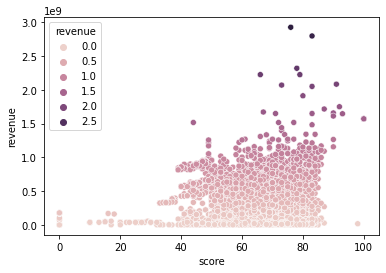

In [36]:
# compare score to revenue
sns.scatterplot(data=imdb_movies, x='score', y='revenue', hue='revenue');

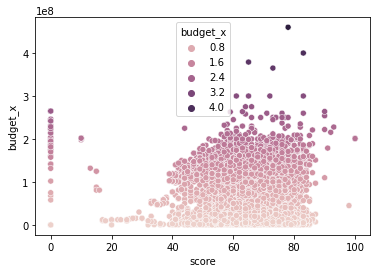

In [37]:
# compare score to budget
sns.scatterplot(data=imdb_movies, x='score', y='budget_x', hue='budget_x');

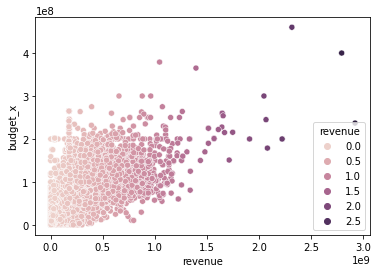

In [38]:
# compare revenue to budget
sns.scatterplot(data=imdb_movies, x='revenue', y='budget_x', hue='revenue');

Looks like slight positive correlations, but nothing too obvious. 

Let's look at the score per genre. 

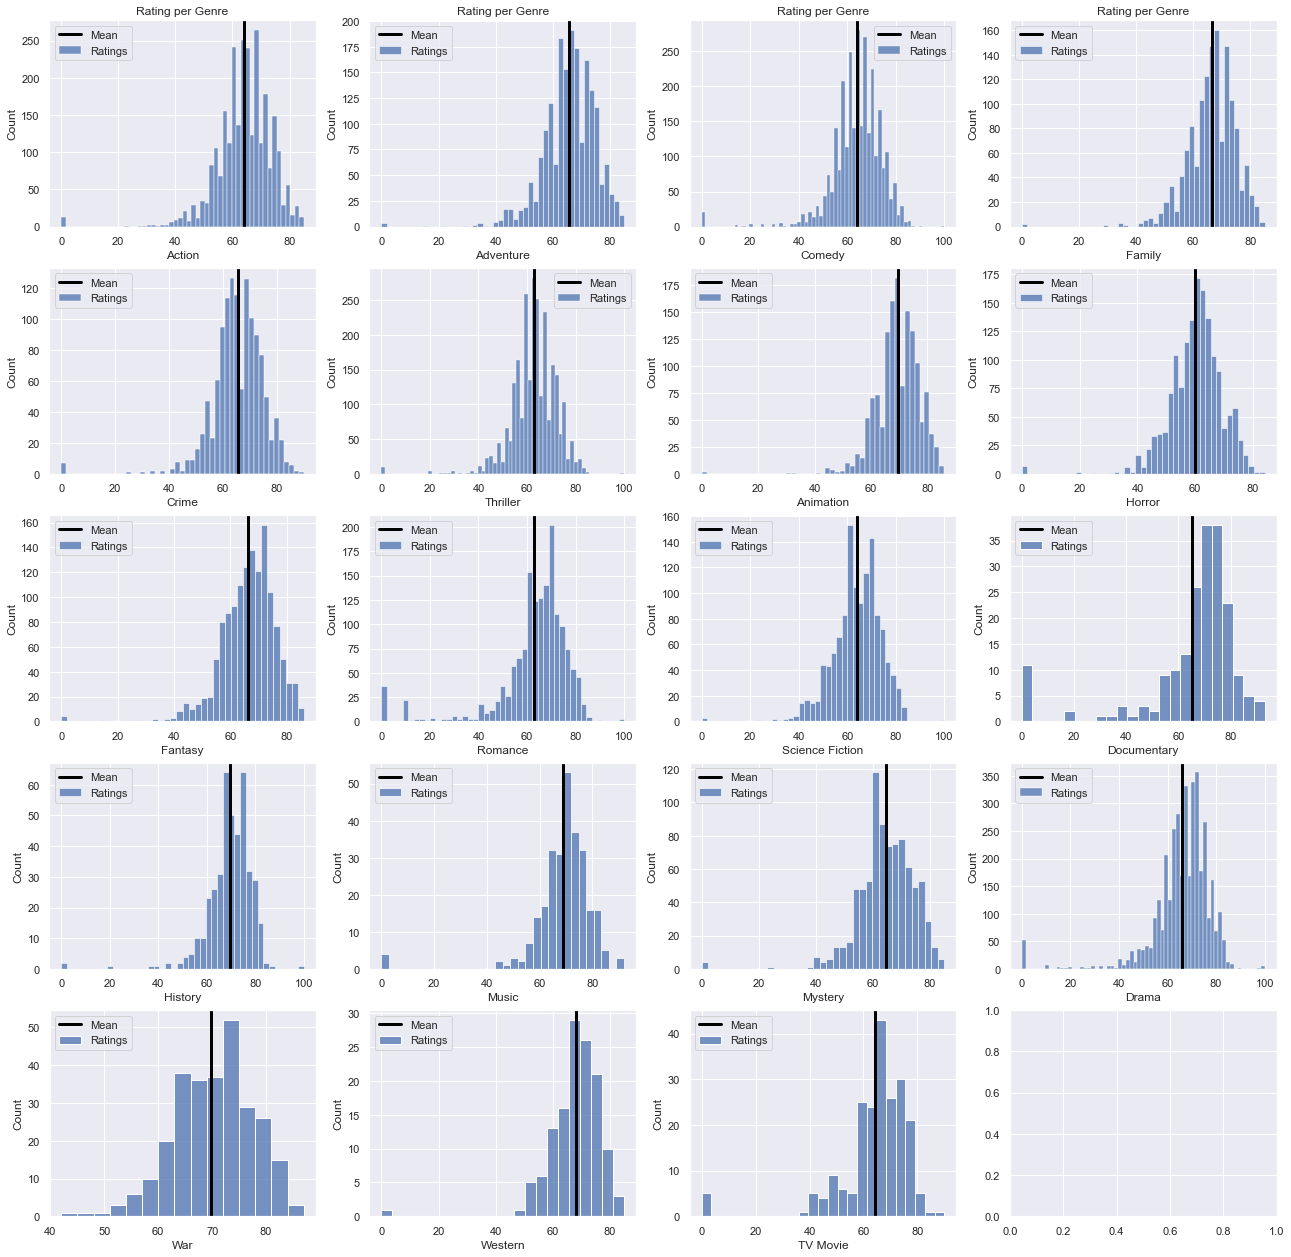

In [39]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['score'], ax = axs[math.floor(x),y%4])
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['score'].mean(), color = 'black', lw = 3)
    
    labels = ['Mean', 'Ratings']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Rating per Genre')        
    y += 1
    x += .25

Next, let's look at revenue per genre. 

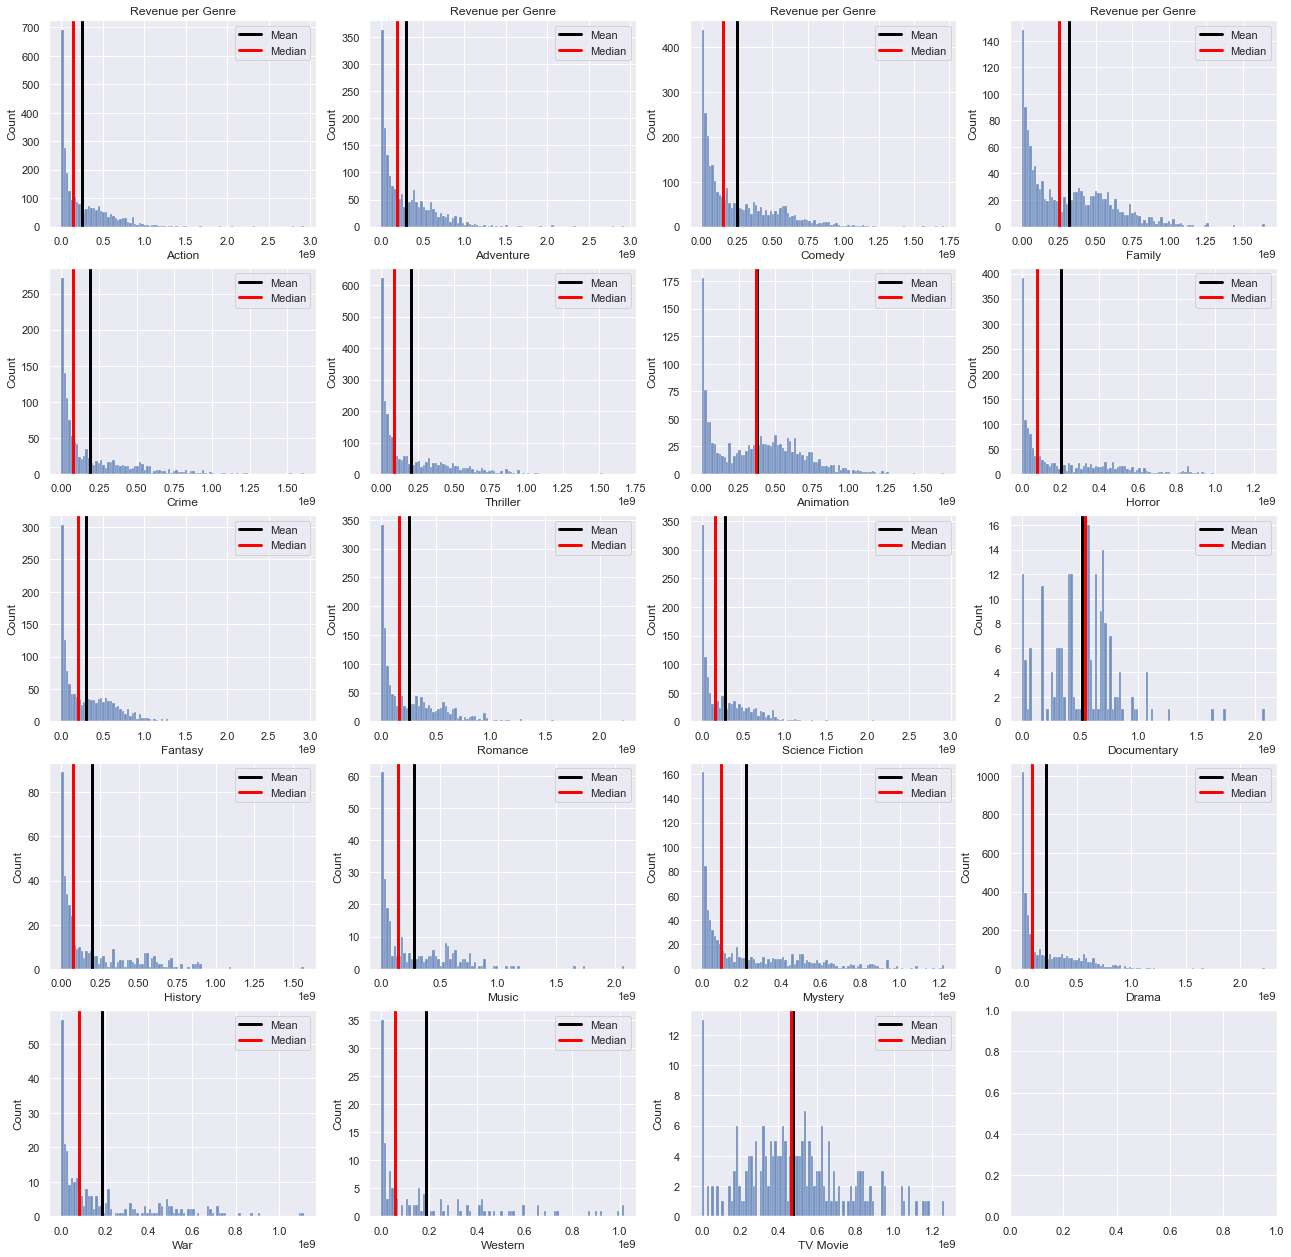

In [40]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(5, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.histplot(imdb_movies[imdb_movies[genre] == True]['revenue'], ax = axs[math.floor(x),y%4], bins=int(np.sqrt(len(imdb_movies[genre]))))
    axs[math.floor(x),y%4].set_xlabel(genre)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['revenue'].mean(), color = 'black', lw = 3)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['revenue'].median(), color = 'red', lw = 3)
   
    labels = ['Mean', 'Median']
    axs[math.floor(x),y%4].legend(labels)
    
    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Revenue per Genre')        
    y += 1
    x += .25
    
plt.savefig("./images/avg_profit_per_genre_multiplot.png", dpi=150)    
    # compare to median, how many movies make a profit vs ones that dont

In [41]:
# this is a cool displot, but it takes a few minutes to run

# sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# plt.figure(figsize = (14, 10))
# sns.displot(data=imdb_movies, x='score', y='revenue', kind='kde')
# plt.xlabel('Average Rating')
# plt.ylabel('Profit')
# plt.title('Rating compared to Profit')
# plt.grid(True)
# plt.show();

This is a general exploration of the budget column: what is the minimum/maximum budget?

In [42]:
# production budget vs profit
imdb_movies['budget_x'].agg(['min','max'])

min           1.0000
max   460000000.0000
Name: budget_x, dtype: float64

In [43]:
# which movie had the highest bugdet?
imdb_movies.loc[imdb_movies['budget_x'] == 460000000]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie
1,Avatar: The Way of Water,2022-12-15,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,False,True,False,False,False,False,False,False,False,False


In [44]:
imdb_movies.loc[imdb_movies['names'].str.contains('Avatar')][['names', 'budget_x', 'revenue']]

,names,budget_x,revenue
1,Avatar: The Way of Water,460000000.0000,2316794914.0000
68,Avatar,237000000.0000,2923706026.0000
572,Avatar: Creating the World of Pandora,100140523.8000,625891229.0000
699,Capturing Avatar,101700000.0000,716719914.2000
777,Avatar: The Deep Dive - A Special Edition of 2...,98800000.0000,580810039.6000
2904,The King's Avatar: For the Glory,167940000.0000,320146113.6000
9416,Avatar Spirits,172000000.0000,580068063.6000


In [45]:
# this is a cool displot, but it takes a few minutes to run
# sns.displot(data=imdb_movies, x='budget_x', y='revenue', kind='kde');

Let's look at different combinations of genre and the revenue they produce.

In [46]:
imdb_movies['profit'] = imdb_movies['revenue'] - imdb_movies['budget_x']

In [47]:
imdb_movies['orig_lang'].value_counts().head()

 English               7341
 Japanese               673
 Spanish, Castilian     387
 Korean                 384
 French                 281
Name: orig_lang, dtype: int64

In [48]:
# dropping anything not in english
imdb_movies = imdb_movies.loc[imdb_movies['orig_lang'] == ' English']

In [49]:
# dropping anything before 1998, gives us 25 years of data
imdb_movies = imdb_movies.loc[imdb_movies['date_x'] > '1998-01-01']

In [50]:
# which movies made a profit over $100,000?
imdb_movies.loc[imdb_movies['profit'] > 100000].head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Western,TV Movie,profit
0,Creed III,2023-03-02,73.0000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,...,False,False,False,False,False,True,False,False,False,196616668.0000
1,Avatar: The Way of Water,2022-12-15,78.0000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,True,False,False,False,False,False,False,False,False,1856794914.0000
2,The Super Mario Bros. Movie,2023-04-05,76.0000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0000,...,False,False,False,False,False,False,False,False,False,624459031.0000
4,Supercell,2023-03-17,61.0000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0000,...,False,False,False,False,False,False,False,False,False,263941958.6000
5,Cocaine Bear,2023-02-23,66.0000,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0000,...,False,False,False,False,False,False,False,False,False,45000000.0000


In [51]:
# what is the mean and median of the profit column?
print(imdb_movies['profit'].mean())
print(imdb_movies['profit'].median())

180992818.66778904
80378084.0


In [52]:
imdb_movies.groupby('genre')['revenue'].mean().sort_values(ascending = False)

genre
Adventure, Action, Science Fiction, Fantasy                                              2068223624.0000
Family, Animation, Adventure, Comedy, Fantasy                                            1437862795.0000
TV Movie, Animation, Science Fiction, Action, Adventure, Comedy, Drama, Fantasy, Music   1180869057.8000
Action, Science Fiction, Horror, Mystery                                                 1168752661.8000
Animation, TV Movie, Action, Comedy, Fantasy                                             1119422066.8000
                                                                                               ...      
Adventure, Fantasy, Science Fiction, Family, Action                                               0.0000
Drama, Fantasy, Comedy                                                                            0.0000
Action, Thriller, Crime, Adventure                                                                0.0000
Comedy, Romance, Fantasy                         

In [53]:
# create a dictionary for each individual genre and the median revenue
# documentary has the highest median revenue
revenue_medians = {}

for genre in genre_list:
    median = imdb_movies[imdb_movies[genre] == True]['revenue'].median()
    revenue_medians[genre] = median
revenue_medians_sorted = sorted(revenue_medians.items(), key=lambda x: x[1], reverse=True)
revenue_medians_sorted

[('Documentary', 542233172.2),
 ('TV Movie', 469568522.4),
 ('Animation', 392188196.0),
 ('Family', 319715683.0),
 ('Adventure', 250191298.7),
 ('Fantasy', 243434798.2),
 ('Science Fiction', 188584535.2),
 ('Music', 167362748.0),
 ('Action', 161929216.5),
 ('Comedy', 146599211.4),
 ('Western', 106515310.0),
 ('Mystery', 98677816.0),
 ('War', 97523020.0),
 ('Romance', 97374152.0),
 ('Horror', 81831866.0),
 ('Thriller', 80073583.0),
 ('History', 76665507.0),
 ('Crime', 71928453.0),
 ('Drama', 69387375.5)]

Above, we can see what our multiplot on revenue vs genre shows. Documentaries have the highest median revenue.

Let's also look at mean.

In [54]:
# create a dictionary for each individual genre and the average revenue
# not normalized
revenue_means = {}

for genre in genre_list:
    mean = imdb_movies[imdb_movies[genre] == True]['revenue'].mean()
    revenue_means[genre] = mean
revenue_means 
revenue_means_sorted = sorted(revenue_means.items(), key=lambda x: x[1], reverse=True)
revenue_means_sorted

[('Documentary', 504977146.8864198),
 ('TV Movie', 471846708.54651165),
 ('Animation', 401238719.48764336),
 ('Family', 347019522.43114257),
 ('Adventure', 340548869.7905797),
 ('Fantasy', 330199644.1764089),
 ('Science Fiction', 306093486.91767675),
 ('Music', 282985112.09090906),
 ('Action', 270245339.678607),
 ('Comedy', 239921005.32046333),
 ('Mystery', 221578726.14369604),
 ('Western', 220669465.25084746),
 ('Horror', 199979449.0441838),
 ('Thriller', 194499578.42893812),
 ('History', 189244794.9480176),
 ('Romance', 188007507.25579512),
 ('War', 182858934.16183206),
 ('Drama', 181894333.93492872),
 ('Crime', 167925962.76549864)]

We can see that Documentaries also have the highest mean revenue. Let's put this into a DataFrame.

In [55]:
# convert dictionary to dataframe
revenue_means_df = pd.DataFrame.from_dict(data = revenue_means, orient = 'index')

In [56]:
# rename the columns so that they make sense
revenue_means_df.rename(columns = {0: 'revenue_avg'}, inplace=True)
revenue_means_df.head()

,revenue_avg
Action,270245339.6786
Adventure,340548869.7906
Comedy,239921005.3205
Family,347019522.4311
Crime,167925962.7655


So we have average revenue for each genre, but let's see if we can normalize it so we can find out what percent of the market each genre makes up.

In [57]:
# create a new column, set=1 for now
imdb_movies['percent_genre_in_market'] = 1

In [58]:
imdb_movies['percent_genre_in_market'].sum()

5821

In [59]:
# same as above. Make sense, only like 80 something movies classified as just action
len(imdb_movies.loc[imdb_movies['genre'] == 'Action']) / len(imdb_movies)

0.008246005840920804

In [60]:
# create a list with the genres cleaned
l = list(imdb_movies.groupby('genre').groups.keys())
clean_list = []
 
for i in l:
    clean_list.append(i.replace('\xa0', " "))
 

In [61]:
# create a new column
# for each genre in our clean list above, look at the percent genre in market where the genre column = genre
# then set that equal to the length of where genre = genre is true divided by total length of dataframe

for genre in clean_list:
    imdb_movies['percent_genre_in_market'].loc[imdb_movies['genre'] == genre] = len(imdb_movies.loc[imdb_movies['genre'] == genre]) / len(imdb_movies)

C:\Users\rache\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [62]:
# creates a new column that is the percent genre in market times the revenue to get percentage revenue
imdb_movies['revenue_percent'] = imdb_movies['percent_genre_in_market'] * imdb_movies['revenue']

In [63]:
# create dictionary for revenue percent means

rev_percent_by_genre = {}

for genre in l:
    mean = imdb_movies[imdb_movies['genre'] == genre]['revenue_percent'].mean()
    rev_percent_by_genre[genre] = mean

In [64]:
# turn dict into dataframe
rev_percent_by_genre_df = pd.DataFrame.from_dict(data = rev_percent_by_genre, orient = 'index')
rev_percent_by_genre_df.rename(columns = {0: 'revenue_adjusted_by_percent'}, inplace=True)
rev_percent_by_genre_df.head()

,revenue_adjusted_by_percent
Action,1824997.9123
"Action, Adventure",283369474.3000
"Action, Adventure, Animation",447548637.2000
"Action, Adventure, Animation, Comedy",401345912.0000
"Action, Adventure, Animation, Comedy, Family",356813557.5000


In [65]:
# filtered for top 20 rev percents
rev_percent_top_20 = rev_percent_by_genre_df['revenue_adjusted_by_percent'].sort_values(ascending=False).head(20)
rev_percent_top_20_df = pd.DataFrame(data = rev_percent_top_20)

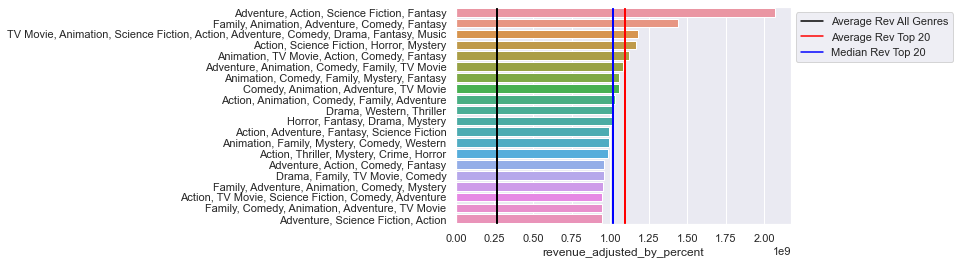

In [66]:
from matplotlib.lines import Line2D

ax = sns.barplot(x=rev_percent_top_20_df['revenue_adjusted_by_percent'], y=rev_percent_top_20_df.index)
ax.axvline(x = rev_percent_by_genre_df['revenue_adjusted_by_percent'].mean(), color = 'black', lw = 2)
ax.axvline(x = rev_percent_top_20_df['revenue_adjusted_by_percent'].mean(), color = 'red', lw = 2)
ax.axvline(x = rev_percent_top_20_df['revenue_adjusted_by_percent'].median(), color = 'blue', lw = 2)

labels = ['Average Rev All Genres', 'Average Rev Top 20', 'Median Rev Top 20']

a = Line2D([], [], color='black', label='Average Rev All Genres')
b = Line2D([], [], color='red', label='Average Rev Top 20')
c = Line2D([], [], color='blue', label='Median Rev Top 20')
plt.legend(handles=[a, b, c], bbox_to_anchor= (1,1));

Next, let's look at profit per individual genre.

In [67]:
# creating copy of dataframe
imdb_movies_split = imdb_movies.copy()

In [68]:
# split up the genre column so we can plot the above graph for individual genre
imdb_movies_split['genre'] = imdb_movies_split['genre'].str.split(",")
imdb_movies_split = imdb_movies_split.explode('genre')
imdb_movies_split.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,History,Music,Mystery,Drama,War,Western,TV Movie,profit,percent_genre_in_market,revenue_percent
0,Creed III,2023-03-02,73.0000,Drama,"After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,...,False,False,False,True,False,False,False,196616668.0000,1.0000,271616668.0000
0,Creed III,2023-03-02,73.0000,Action,"After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0000,...,False,False,False,True,False,False,False,196616668.0000,1.0000,271616668.0000
1,Avatar: The Way of Water,2022-12-15,78.0000,Science Fiction,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,False,False,False,False,False,False,False,1856794914.0000,1.0000,2316794914.0000
1,Avatar: The Way of Water,2022-12-15,78.0000,Adventure,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,False,False,False,False,False,False,False,1856794914.0000,1.0000,2316794914.0000
1,Avatar: The Way of Water,2022-12-15,78.0000,Action,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0000,...,False,False,False,False,False,False,False,1856794914.0000,1.0000,2316794914.0000


In [69]:
# groupby genre and find counts
imdb_movies_split.groupby('genre')[['names']].count().head()

,names
genre,
Action,912
Adventure,336
Animation,473
Comedy,798
Crime,197


In [70]:
# groupby genre, find means
imdb_movies_split.groupby('genre').mean().head()

,score,budget_x,revenue,profit,percent_genre_in_market,revenue_percent
genre,,,,,,
Action,62.0800,75116157.6741,252857737.7261,177741580.0520,0.9478,241305420.8976
Adventure,65.2827,93592044.8940,326798269.8857,233206224.9917,0.9940,324719885.2342
Animation,68.6702,95400631.0913,408688370.0706,313287738.9793,0.9747,394667632.5810
Comedy,62.4737,47853447.8291,174486792.9153,126633345.0862,0.7533,137329116.4655
Crime,64.6904,44398638.3827,141381100.9299,96982462.5472,0.9544,127579497.6254


In [71]:
# groupby genre, find medians
imdb_movies_split.groupby('genre').median().head()

,score,budget_x,revenue,profit,percent_genre_in_market,revenue_percent
genre,,,,,,
Action,62.0000,63090000.0000,157384381.0000,79540727.6000,1.0000,132919299.0000
Adventure,65.0000,85600000.0000,198695528.5000,112707515.0000,1.0000,197668764.5000
Animation,69.0000,98140000.0000,409222379.8000,303191819.0000,1.0000,385000315.0000
Comedy,63.0000,35000000.0000,101725853.5000,66223091.5000,1.0000,50252357.5000
Crime,65.0000,30000000.0000,50334418.0000,25414351.2000,1.0000,43164679.0000


In [72]:
# clean list of genres for the new dataframe
x = list(imdb_movies_split.groupby('genre').groups.keys())
clean_split_list = []
 
for i in x:
    clean_split_list.append(i.replace('\xa0', ""))
    
clean_split_list = np.unique(clean_split_list)
print(clean_split_list)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Mystery' 'Romance'
 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [73]:
# clean list of means for new dataframe
clean_split_list_means = []

for genre in clean_split_list:
    clean_split_list_means.append(imdb_movies_split[imdb_movies_split['genre'] == genre]['profit'].mean())
print(clean_split_list_means)

[177741580.05197367, 233206224.9916667, 313287738.9792812, 126633345.08621553, 96982462.54720813, 414490623.4375, 121741596.15630433, 265211178.43703702, 198241202.0476821, 191111280.90434787, 147546463.71221864, 234904381.76078433, 159213038.80789474, 191433277.00254777, 205112355.46481478, 341236906.5866667, 155921149.45413533, 144886382.88444445, 182474038.43571427]


In [74]:
# clean list of medians for new dataframe
clean_split_list_median = []

for genre in clean_split_list:
    clean_split_list_median.append(imdb_movies_split[imdb_movies_split['genre'] == genre]['profit'].median())
print(clean_split_list_median)

[79540727.6, 112707515.0, 303191819.0, 66223091.5, 25414351.2, 472418566.6, 31050276.5, 220601141.60000002, 98092918.80000001, 172810486.8, 58859976.5, 132552290.0, 75201172.5, 120348016.0, 87988752.6, 392042884.5, 57956618.0, 36118378.0, 36350361.5]


In [75]:
means_dict = dict(zip(clean_split_list, clean_split_list_means))

genre_means_df = pd.DataFrame.from_dict(data = means_dict, orient = 'index')
genre_means_df.rename(columns = {0: 'profit_avg'}, inplace=True)
genre_means_df['market share'] = imdb_movies_split.groupby('genre')[['names']].count() / len(imdb_movies_split)
genre_means_df['adjusted_average_profit'] = genre_means_df['profit_avg'] * genre_means_df['market share']

In [76]:
genre_means_df.head()

,profit_avg,market share,adjusted_average_profit
Action,177741580.0520,0.0586,10413073.8747
Adventure,233206224.9917,0.0216,5033551.2043
Animation,313287738.9793,0.0304,9519181.6366
Comedy,126633345.0862,0.0513,6491514.7028
Crime,96982462.5472,0.0127,1227310.6650


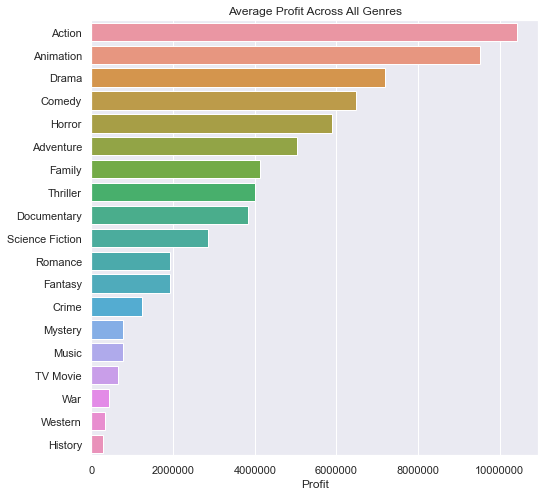

In [77]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(y=list(genre_means_df['adjusted_average_profit'].sort_values(ascending=False).index), 
                 x=list(genre_means_df['adjusted_average_profit'].sort_values(ascending=False).values))

plt.title('Average Profit Across All Genres')
plt.xlabel('Profit')

plt.ticklabel_format(style='plain', axis='x');

Let's also look at the median profit per genre.

In [78]:
medians_dict = dict(zip(clean_split_list, clean_split_list_median))

genre_medians_df = pd.DataFrame.from_dict(data = medians_dict, orient = 'index')
genre_medians_df.rename(columns = {0: 'profit_median'}, inplace=True)
genre_medians_df['market share'] = imdb_movies_split.groupby('genre')[['names']].count() / len(imdb_movies_split)
genre_medians_df['adjusted_median_profit'] = genre_medians_df['profit_median'] * genre_medians_df['market share']

In [79]:
genre_medians_df.head()

,profit_median,market share,adjusted_median_profit
Action,79540727.6000,0.0586,4659930.8519
Adventure,112707515.0000,0.0216,2432692.5573
Animation,303191819.0000,0.0304,9212419.2450
Comedy,66223091.5000,0.0513,3394747.0301
Crime,25414351.2000,0.0127,321617.9859


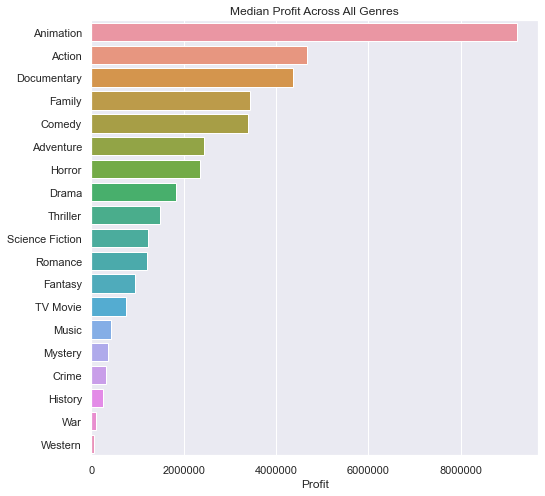

In [80]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(y=list(genre_medians_df['adjusted_median_profit'].sort_values(ascending=False).index), 
                 x=list(genre_medians_df['adjusted_median_profit'].sort_values(ascending=False).values))

plt.title('Median Profit Across All Genres')
plt.xlabel('Profit')

plt.ticklabel_format(style='plain', axis='x');

Let's look at budget per genre, both mean and median.

In [81]:
# clean list of means for new dataframe
budget_genre_means = []

for genre in clean_split_list:
    budget_genre_means.append(imdb_movies_split[imdb_movies_split['genre'] == genre]['budget_x'].mean())
print(budget_genre_means)

[75116157.67412281, 93592044.89404762, 95400631.09133191, 47853447.82907269, 44398638.382741116, 93821518.93194444, 45866274.84108696, 89136447.55720165, 82436541.8807947, 65668373.56521739, 47409377.252411574, 61244949.32549019, 53191059.80789473, 64597068.85732483, 76515954.59166667, 112274333.33333333, 59289371.5679198, 73415458.14666666, 63453928.571428575]


In [82]:
# clean list of medians for new dataframe
budget_genre_medians = []

for genre in clean_split_list:
    budget_genre_medians.append(imdb_movies_split[imdb_movies_split['genre'] == genre]['budget_x'].median())
print(budget_genre_medians)

[63090000.0, 85600000.0, 98140000.0, 35000000.0, 30000000.0, 90100000.0, 28000000.0, 96200000.0, 75000000.0, 60000000.0, 20000000.0, 48300000.0, 39000000.0, 53340523.8, 70000000.0, 113900000.0, 40517129.0, 62000000.0, 68060000.0]


In [83]:
budget_genre_means_dict = dict(zip(clean_split_list, budget_genre_means))

budget_genre_means_df = pd.DataFrame.from_dict(data = budget_genre_means_dict, orient = 'index')
budget_genre_means_df.rename(columns = {0: 'budget_avg'}, inplace=True)
budget_genre_means_df['market_share'] = imdb_movies_split.groupby('genre')[['names']].count() / len(imdb_movies_split)
budget_genre_means_df['adjusted_average_budget'] = budget_genre_means_df['budget_avg'] * budget_genre_means_df['market_share']
budget_genre_means_df.head()

,budget_avg,market_share,adjusted_average_budget
Action,75116157.6741,0.0586,4400715.3465
Adventure,93592044.8940,0.0216,2020101.9518
Animation,95400631.0913,0.0304,2898727.9827
Comedy,47853447.8291,0.0513,2453077.1098
Crime,44398638.3827,0.0127,561863.6707


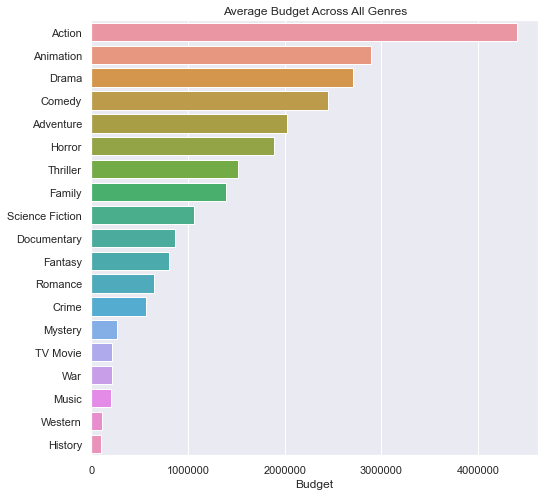

In [84]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(y=list(budget_genre_means_df['adjusted_average_budget'].sort_values(ascending=False).index), 
                 x=list(budget_genre_means_df['adjusted_average_budget'].sort_values(ascending=False).values))

plt.title('Average Budget Across All Genres')
plt.xlabel('Budget')

plt.ticklabel_format(style='plain', axis='x');

In [85]:
budget_genre_medians_dict = dict(zip(clean_split_list, clean_split_list_median))

budget_genre_medians_df = pd.DataFrame.from_dict(data = budget_genre_medians_dict, orient = 'index')
budget_genre_medians_df.rename(columns = {0: 'budget_median'}, inplace=True)
budget_genre_medians_df['market_share'] = imdb_movies_split.groupby('genre')[['names']].count() / len(imdb_movies_split)
budget_genre_medians_df['adjusted_median_budget'] = budget_genre_medians_df['budget_median'] * budget_genre_medians_df['market_share']
budget_genre_medians_df.head()

,budget_median,market_share,adjusted_median_budget
Action,79540727.6000,0.0586,4659930.8519
Adventure,112707515.0000,0.0216,2432692.5573
Animation,303191819.0000,0.0304,9212419.2450
Comedy,66223091.5000,0.0513,3394747.0301
Crime,25414351.2000,0.0127,321617.9859


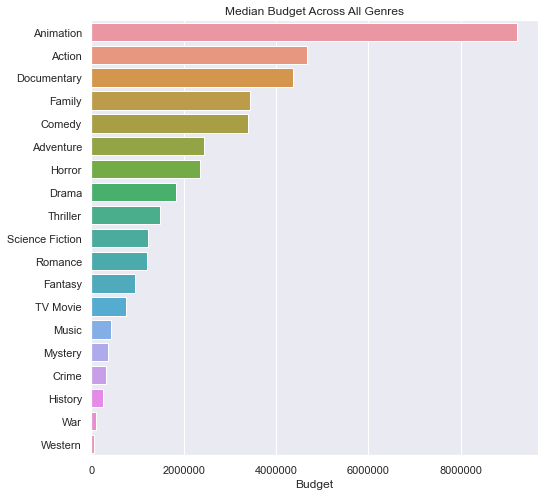

In [86]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(y=list(budget_genre_medians_df['adjusted_median_budget'].sort_values(ascending=False).index), 
                 x=list(budget_genre_medians_df['adjusted_median_budget'].sort_values(ascending=False).values))

plt.title('Median Budget Across All Genres')
plt.xlabel('Budget')

plt.ticklabel_format(style='plain', axis='x');

Budget and profit per genre match up nicely - action, animation, and documentaries are top 3. Animation is higher if you look at median, action is higher if you look at mean.

Let's pull out release month from date_x column so we can analyze budget/profit per release month, and genre per release month.

In [87]:
imdb_movies['Release Month'] = pd.to_datetime(imdb_movies['date_x']).dt.month

Let's start with average profit per genre by release month. 

In [88]:
# created nested dict for mean
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War']

genre_dict = {}
for genre in genre_list:
    genre_means = imdb_movies[imdb_movies[genre] == True].groupby('Release Month')['profit'].mean()
    
    
    month_dict = {}
    for key, value in genre_means.items():
        month_dict[key] = value
        genre_dict[genre] = month_dict

In [89]:
list(genre_dict.keys())

['Adventure',
 'Comedy',
 'Family',
 'Crime',
 'Thriller',
 'Animation',
 'Horror',
 'Fantasy',
 'Romance',
 'Science Fiction',
 'Documentary',
 'History',
 'Music',
 'Mystery',
 'Drama',
 'War']

In [90]:
# testing it works
list(genre_dict['Crime'].values())

[125834912.405,
 150935038.93823528,
 103844229.21176472,
 131766471.67213115,
 85785204.56400001,
 136581321.36363637,
 127001243.44651164,
 110282993.32162164,
 72534145.04225351,
 145881204.43658534,
 84082158.20645161,
 114819049.06153846]

In [91]:
# let's convert to a dataframe so it's more usable
genre_dict_df = pd.DataFrame.from_dict(data = genre_dict, orient = 'index')
genre_dict_df = genre_dict_df.transpose()
genre_dict_df

,Adventure,Comedy,Family,Crime,Thriller,Animation,Horror,Fantasy,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War
1,147071645.9271,123101425.6815,214380267.0684,125834912.4050,157330785.7966,199970381.1288,153104386.5875,116081056.3276,110913807.0358,176222755.3736,431779917.3231,97368221.1000,104838110.6133,226064991.8564,138783278.5578,117152738.3636
2,193396478.5500,170491037.7857,275134233.6213,150935038.9382,142634306.5833,299926626.2837,147164705.5944,131546193.6000,153696330.6259,191637987.6615,412857376.0444,127522140.5429,178883772.8444,161327738.5628,125318690.8785,49316137.8200
3,193622072.6796,183049488.1494,226311560.9981,103844229.2118,140895514.5254,312249077.3443,110561453.2411,250929585.5506,141332822.0000,182797148.5041,511018749.1143,167307800.1905,384452465.3467,193494639.4630,137750168.1667,159366062.3200
4,236285745.7182,140494638.4531,176922120.6182,131766471.6721,129293920.7108,232375687.7211,149073885.1737,169479854.6327,82220306.5245,280522812.6968,347578274.9000,26842291.2727,195851503.7385,110482827.0596,93527843.6567,99772367.4333
5,316387202.6697,161496728.1527,272273625.4343,85785204.5640,126200822.3942,304056480.3750,93651716.0406,287148038.4229,151831635.7733,196185455.7607,351028618.3467,242138605.4308,217314798.4615,135683209.5692,137296426.5072,70204651.7778
6,301167089.2125,235662312.7961,288983471.2209,136581321.3636,181051036.5145,379076000.5754,169243993.0592,269878379.9207,164714405.9414,275282737.5841,369194438.4667,157069276.9231,200353479.8000,174861398.7086,156188942.2138,238840280.9667
7,268074170.7931,174834092.2179,301352889.2900,127001243.4465,138378116.4327,323009054.9220,161022166.9019,325078643.0800,178483604.2174,255832653.4973,335097138.5500,204462446.7273,74074587.2250,176330551.9026,191018723.6202,81692377.0800
8,200629768.4300,179479091.6554,311408418.6943,110282993.3216,116255390.4096,360983682.0952,141149847.4946,235736164.9649,141957451.7033,203809629.8233,344359841.3143,77436114.9857,180971456.0636,134671849.2070,109684855.1049,99138100.7231
9,175598706.1639,178947296.0587,233288000.6000,72534145.0423,105036478.9924,281054452.1188,159950937.7485,205130846.3908,120031494.7429,173594411.0116,544591078.6154,53286553.8783,268693892.6952,143815726.8295,116538975.0829,72460829.1200
10,256488690.9877,191937782.9521,309968928.4000,145881204.4366,163643495.5465,375141607.6800,187877456.9740,278852450.0048,109840720.9083,236618948.3842,356491777.7875,83173904.7130,220015996.5263,212441361.8225,130312736.2595,168785993.0462


In [92]:
genre_dict_df.columns

Index(['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
       'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary',
       'History', 'Music', 'Mystery', 'Drama', 'War'],
      dtype='object')

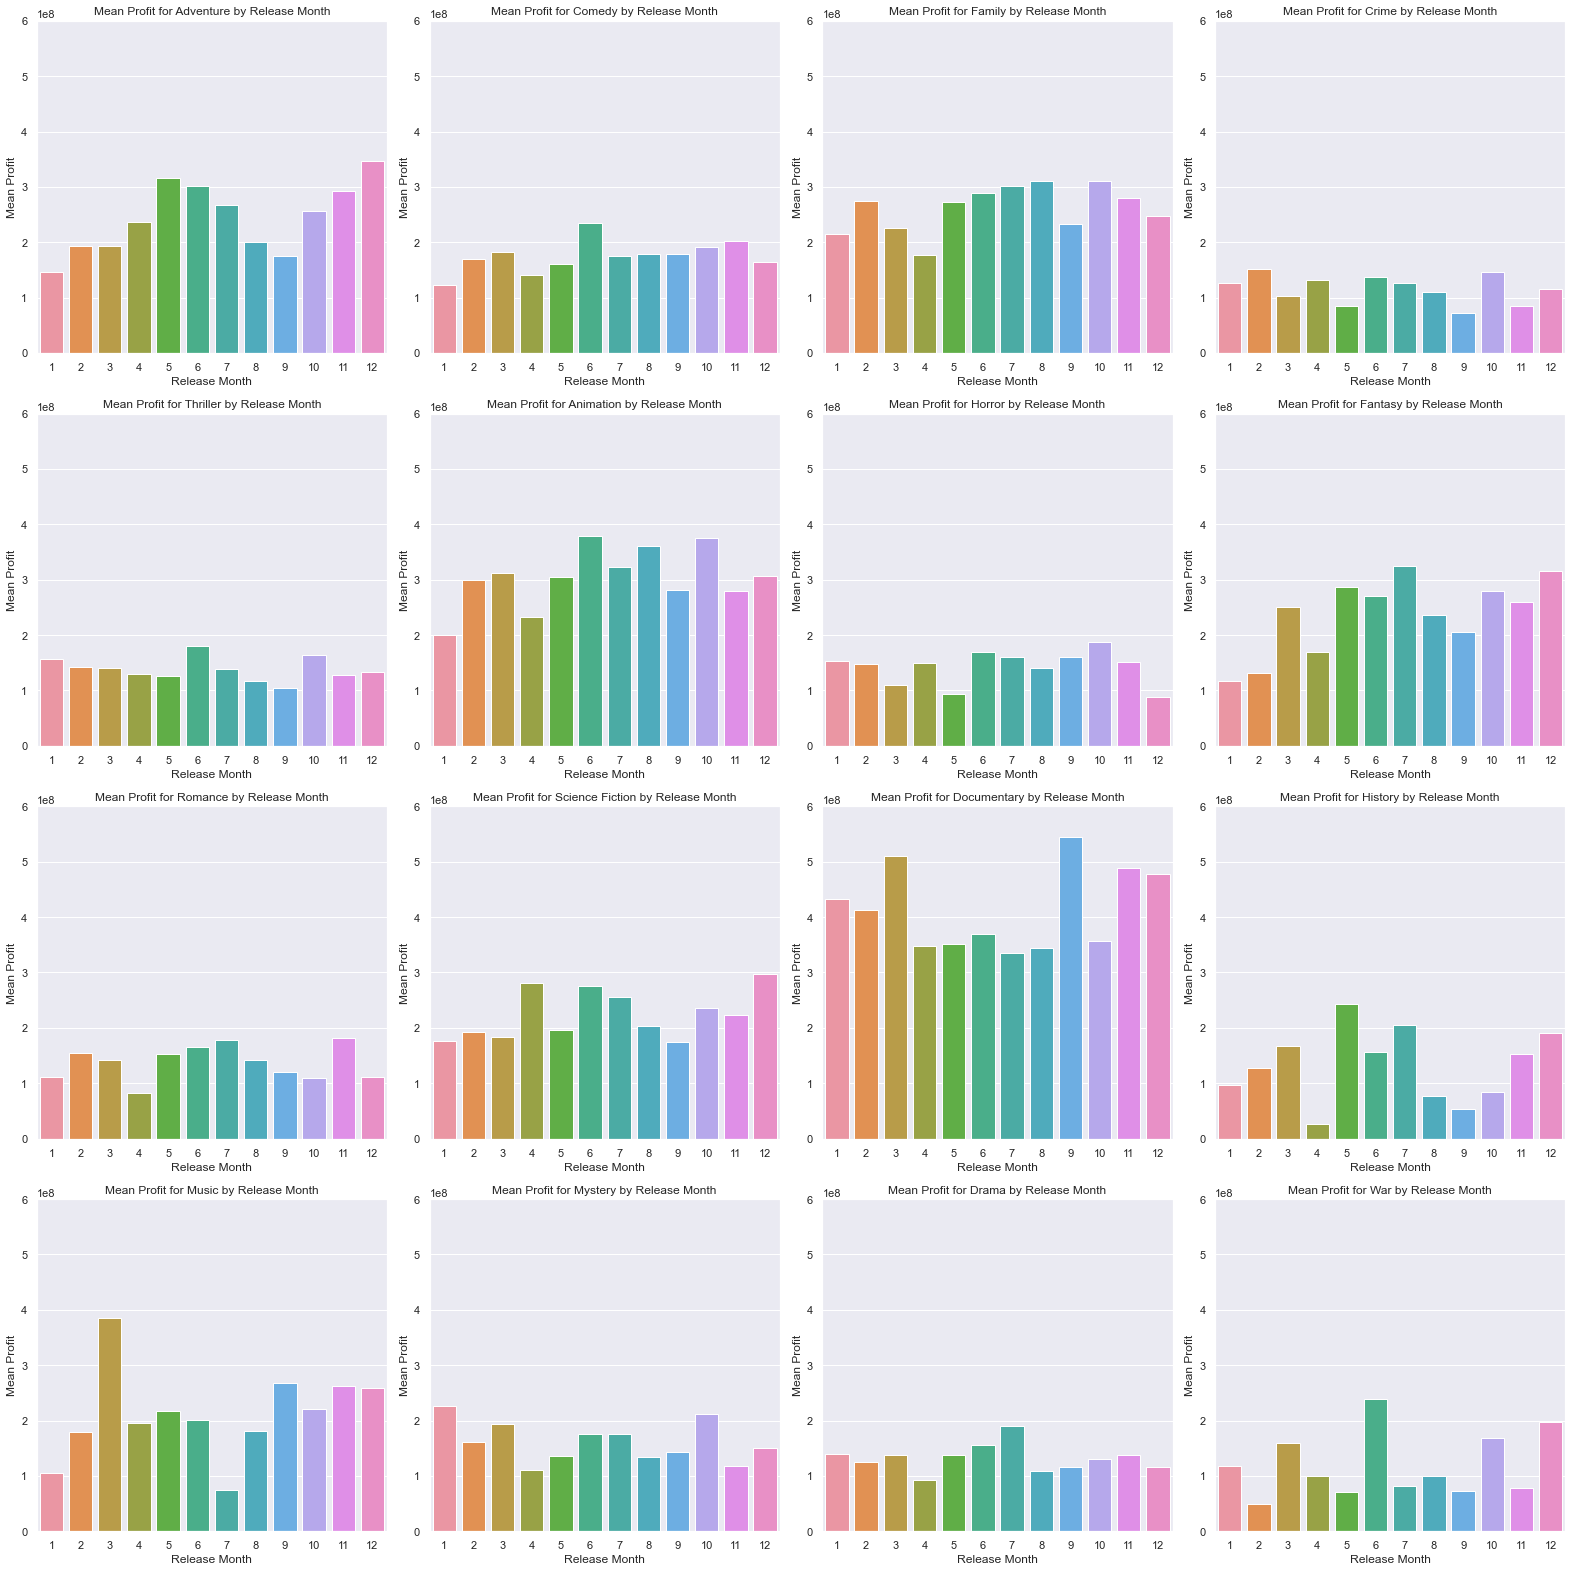

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Create a subplots grid for visualizing revenue for each genre over the course of the year.
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif',
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(4, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_dict_df.columns:
       
    sns.barplot(x=genre_dict_df[genre].index, 
                y=genre_dict_df[genre].values, 
                data=genre_dict_df, ax=axs[math.floor(x), y % 4])
    
    axs[math.floor(x), y % 4].set_ylim(0, 600000000)
       
    axs[math.floor(x), y % 4].set_xlabel('Release Month')
    axs[math.floor(x), y % 4].set_ylabel('Mean Profit')
    axs[math.floor(x), y % 4].set_title(f'Mean Profit for {genre} by Release Month')
    
    y += 1
    x += .25

# Adjust layout spacing
plt.tight_layout()
plt.savefig("./images/mean_profit_by_genre_release_month.png", dpi=150)
plt.show();

Let's now look at median profit by genre per release month.

In [94]:
# created nested dict for mean
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War']

genre_dict_medians = {}
for genre in genre_list:
    genre_medians = imdb_movies[imdb_movies[genre] == True].groupby('Release Month')['profit'].median()
    
    
    month_dict_median = {}
    for key, value in genre_medians.items():
        month_dict_median[key] = value
        genre_dict_medians[genre] = month_dict_median

In [95]:
# convert to a dataframe so it's more usable
genre_dict_df_medians = pd.DataFrame.from_dict(data = genre_dict_medians, orient = 'index')
genre_dict_df_medians = genre_dict_df_medians.transpose()
genre_dict_df_medians

,Adventure,Comedy,Family,Crime,Thriller,Animation,Horror,Fantasy,Romance,Science Fiction,Documentary,History,Music,Mystery,Drama,War
1,83447602.5000,74343513.0000,155127968.0000,50878096.0000,78159781.0000,177510892.0000,92262827.8000,66566812.5000,53465522.0000,127851995.0000,385338403.8000,55111522.5000,80620350.0000,137068340.0000,64715863.0000,40913706.0000
2,120254940.0000,64949429.5000,278948698.4000,38777050.0000,36032885.0000,296727372.0000,41518957.0000,34629497.0000,65146165.0000,48405843.5000,482088855.0000,28469033.0000,71213266.5000,44013424.0000,29075475.5000,21983995.5000
3,124806430.0000,101270303.0000,150212113.0000,33543925.5000,45220729.0000,297617708.4000,29557991.6000,176174831.2000,66728529.0000,76731325.0000,514691938.7000,38269970.0000,226918244.6000,61153677.0000,36442938.0000,102868128.5000
4,67052146.5000,52556228.0000,76147688.0000,30558582.0000,35538560.0000,171568221.8000,54672701.5000,64857425.0000,23782670.0000,83230870.6000,380109446.4000,-3815600.0000,109244329.0000,45593167.0000,6629075.0000,22462209.1000
5,275208567.5000,65020098.5000,213273842.4000,15674532.0000,33732157.0000,385057464.2000,36818365.5000,183035819.0000,64723269.0000,148120910.8000,322780852.6000,250561639.6000,126713434.0000,33610009.0000,42907734.0000,59752036.0000
6,214953905.0000,148475518.7000,197124718.9000,55494797.0000,98462054.8000,360155383.0000,134165005.2000,227125974.6000,101160525.5000,189028980.0000,340351505.2000,6442599.4000,62092097.0000,203779191.0000,60252556.5000,152091226.2000
7,179751131.0000,83471326.6000,258419357.6000,19753825.0000,36918379.0000,310232545.6000,57956618.0000,288938125.6000,59115528.6000,188966034.0000,333765606.5000,105300000.0000,10637531.0000,73450484.0000,65714875.0000,6099609.4000
8,112110855.8000,97198332.2000,282704845.2000,40725853.5000,52334244.0000,326628573.6000,43785551.0000,134822438.0000,58218317.1000,139814941.9000,197574712.6000,14126525.5000,75616881.1000,52411570.0000,34398483.5000,31583403.0000
9,92017196.5000,99212327.4000,165799997.0000,41123210.0000,33016755.0000,264583212.4000,67592669.0000,134822438.0000,50844775.0000,76877191.4000,596723777.2000,17021488.0000,242229948.0000,51648359.0000,24821299.0000,19618783.2000
10,199315950.8000,121724818.0000,310232545.6000,67674457.5000,68038368.0000,380819096.4000,96261973.5000,256184903.2000,37349901.0000,79722143.9000,472418566.6000,23888043.0000,201200000.0000,97404287.0000,35582563.0000,130315681.0000


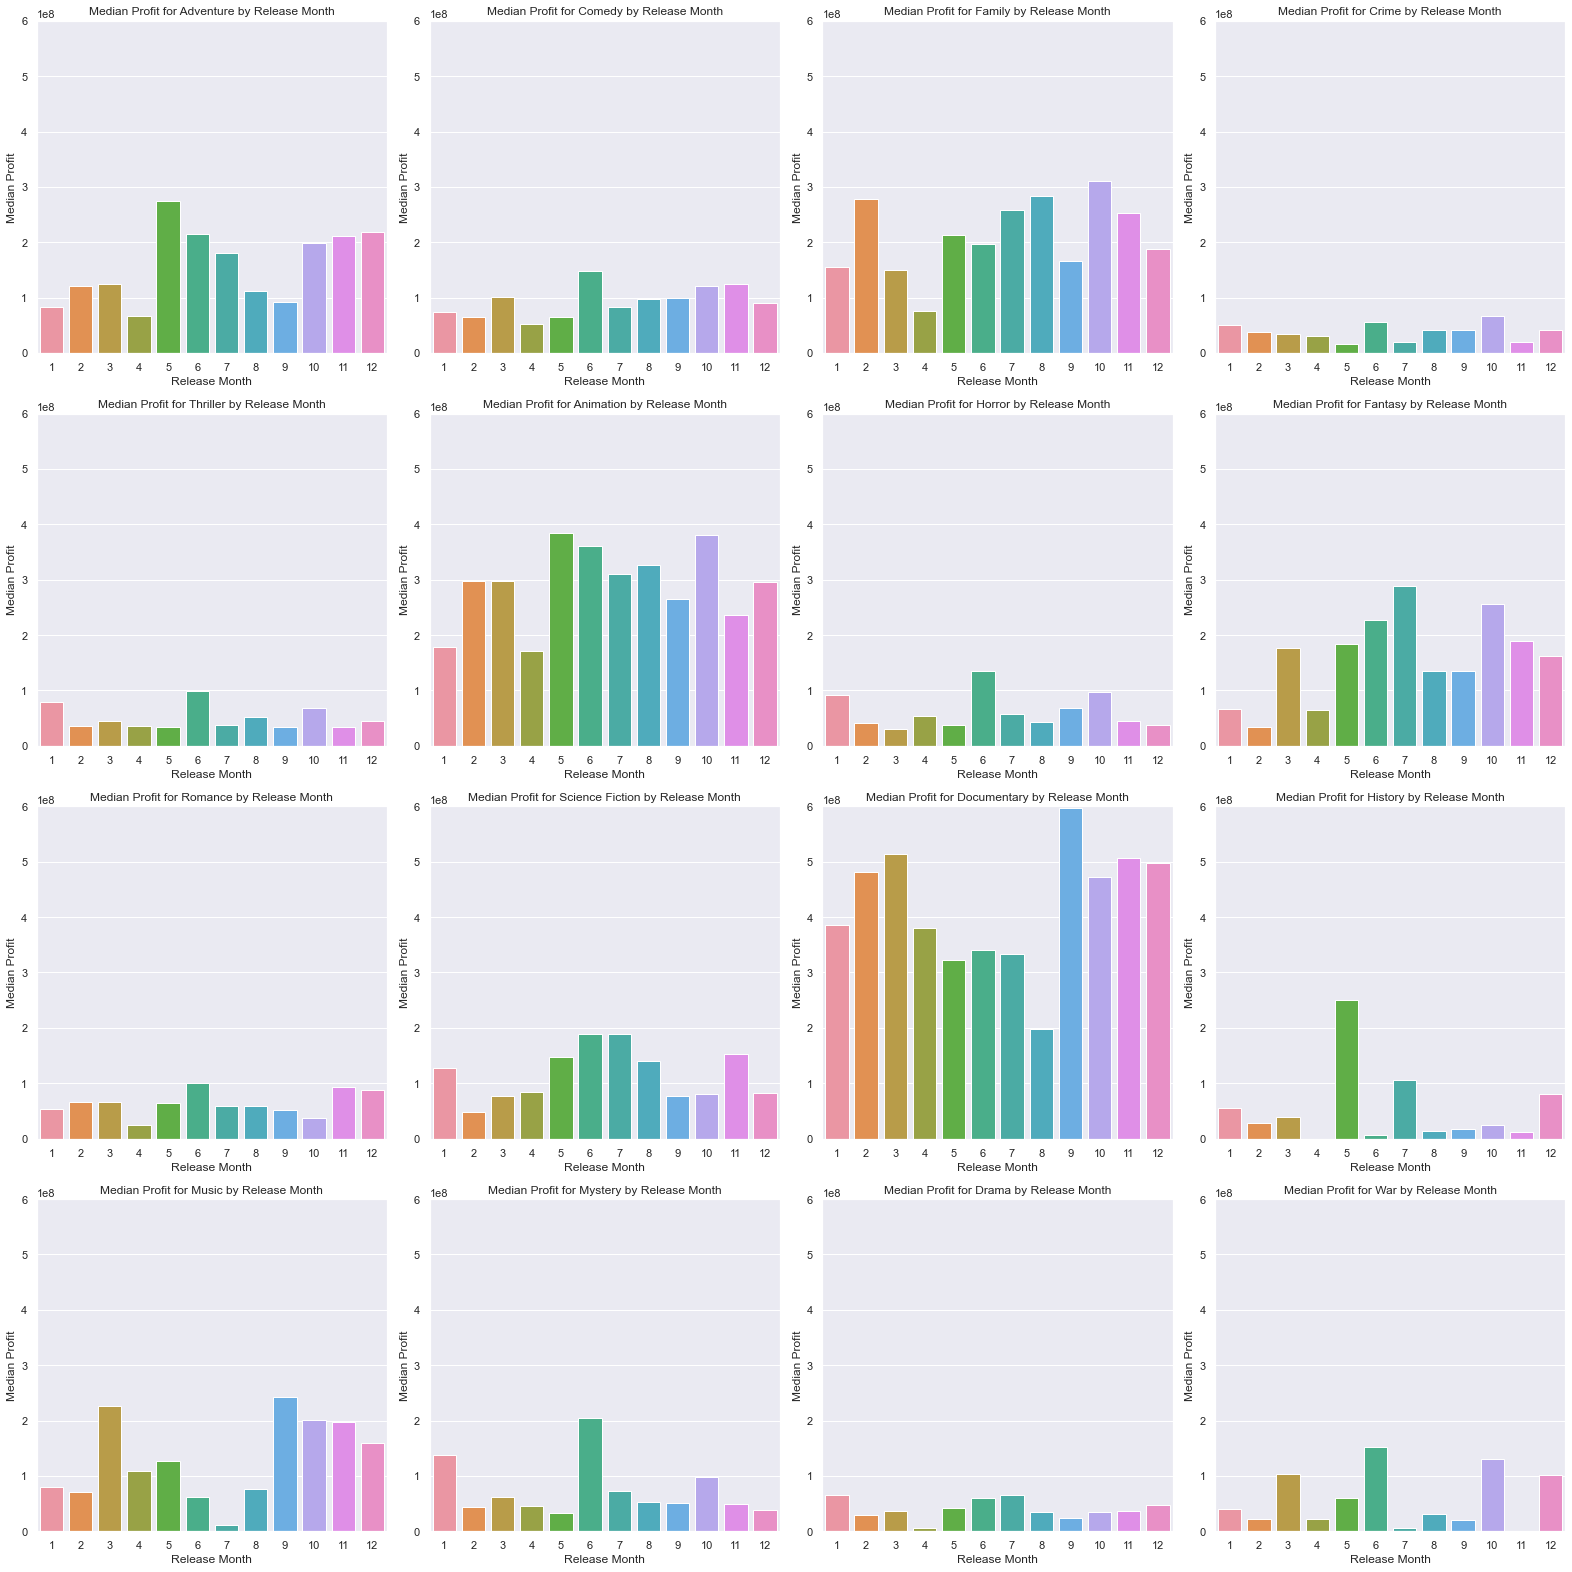

In [96]:
# Create a subplots grid for visualizing profit for each genre over the course of the year.
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif',
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(4, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_dict_df_medians.columns:
       
    sns.barplot(x=genre_dict_df_medians[genre].index, 
                y=genre_dict_df_medians[genre].values, 
                data=genre_dict_df_medians, ax=axs[math.floor(x), y % 4])
    
    axs[math.floor(x), y % 4].set_ylim(0, 600000000)
       
    axs[math.floor(x), y % 4].set_xlabel('Release Month')
    axs[math.floor(x), y % 4].set_ylabel('Median Profit')
    axs[math.floor(x), y % 4].set_title(f'Median Profit for {genre} by Release Month')
    
    y += 1
    x += .25

# Adjust layout spacing
plt.tight_layout()
plt.savefig("./images/median_profit_by_genre_release_month.png", dpi=150)
plt.show();

Look how documentaries pop off, especially in September. The rest of the genres have a relatievly low median profit comparatively. Let's now compare release month to profits by both the mean and median.

In [97]:
imdb_movies[['names', 'Release Month', 'profit']]
mean_profit_by_release = imdb_movies.groupby('Release Month')[['profit']].mean()
median_profit_by_release = imdb_movies.groupby('Release Month')[['profit']].median()

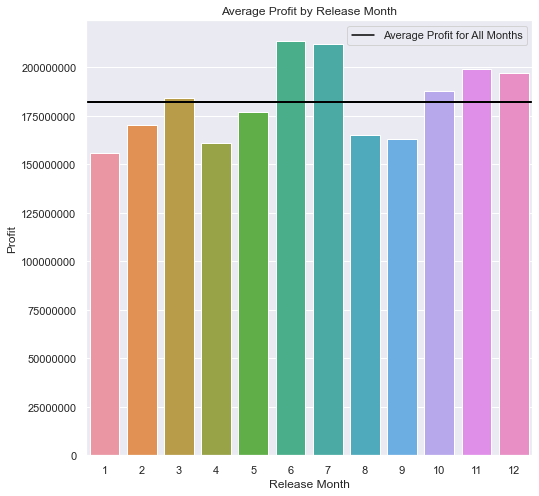

In [98]:
# let's look at mean profit by release date
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(x=mean_profit_by_release.index, 
                 y=list(mean_profit_by_release['profit'].values))

ax.axhline(y = np.mean(list(mean_profit_by_release['profit'].values)), color = 'black', lw = 2)

a = Line2D([], [], color='black', label='Average Profit for All Months')

plt.legend(handles=[a], bbox_to_anchor= (1,1))
plt.title('Average Profit by Release Month')
plt.ylabel('Profit')

plt.ticklabel_format(style='plain', axis='y');

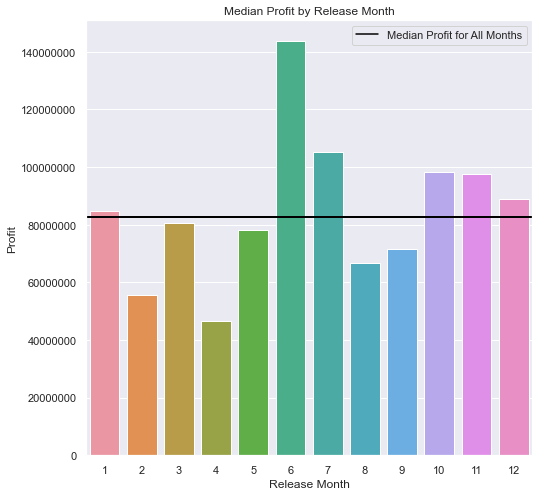

In [99]:
# let's look at median profit by release date
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(x=mean_profit_by_release.index, 
                 y=list(median_profit_by_release['profit'].values))

ax.axhline(y = np.median(list(median_profit_by_release['profit'].values)), color = 'black', lw = 2)

a = Line2D([], [], color='black', label='Median Profit for All Months')

plt.legend(handles=[a], bbox_to_anchor= (1,1))
plt.title('Median Profit by Release Month')
plt.ylabel('Profit')

plt.ticklabel_format(style='plain', axis='y');

From these, we can see that the median profit by release month is not so great in September, but documentaries pop off in September as seen above, likely due to lack of competition. Releasing a documentary in September is a recipe for success. 

We see that in general, the mean profit is highest in June, July, October, November, December. The same months exceed the median. 

Out of curiousity, does budget follow the same pattern?

In [100]:
imdb_movies[['names', 'budget_x', 'Release Month']]
mean_budget_by_release = imdb_movies.groupby('Release Month')[['budget_x']].mean()
median_budget_by_release = imdb_movies.groupby('Release Month')[['budget_x']].median()

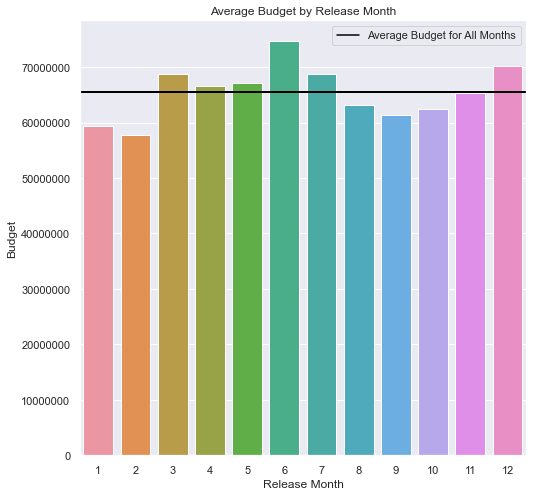

In [101]:
# let's look at mean budget by release date
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(x=mean_budget_by_release.index, 
                 y=list(mean_budget_by_release['budget_x'].values))

ax.axhline(y = np.mean(list(mean_budget_by_release['budget_x'].values)), color = 'black', lw = 2)

a = Line2D([], [], color='black', label='Average Budget for All Months')

plt.legend(handles=[a], bbox_to_anchor= (1,1))
plt.title('Average Budget by Release Month')
plt.ylabel('Budget')

plt.ticklabel_format(style='plain', axis='y');

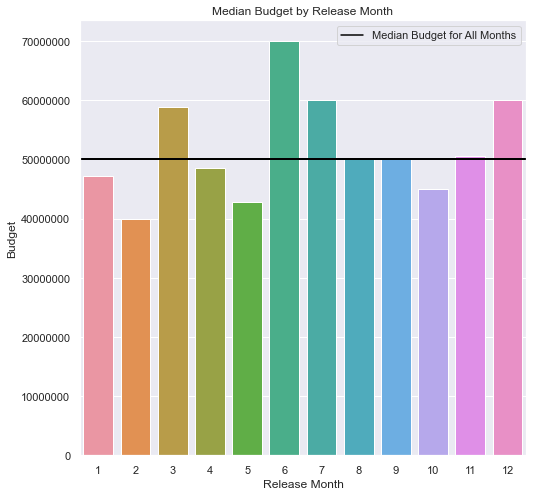

In [102]:
# let's look at median budget by release date
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.barplot(x=median_budget_by_release.index, 
                 y=list(median_budget_by_release['budget_x'].values))

ax.axhline(y = np.median(list(median_budget_by_release['budget_x'].values)), color = 'black', lw = 2)

a = Line2D([], [], color='black', label='Median Budget for All Months')

plt.legend(handles=[a], bbox_to_anchor= (1,1))
plt.title('Median Budget by Release Month')
plt.ylabel('Budget')

plt.ticklabel_format(style='plain', axis='y');

Mean budget tells us March through July, and November and December have higher budgets. Median budget points to March, June, July, August, September, November, and December. 

So similar but not quite the same as profit.

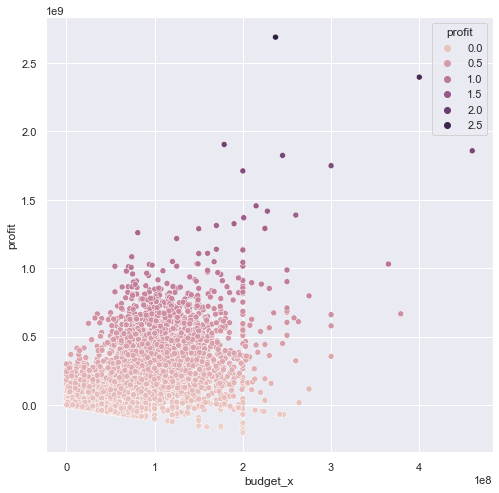

In [103]:
# budget vs profit scatterplot
sns.scatterplot(data=imdb_movies, x=imdb_movies['budget_x'], y=imdb_movies['profit'], hue='profit');

Let's zoom in on documentaries and see budget vs revenue.

In [104]:
imdb_movies.loc[imdb_movies['genre'] == 'Documentary']['budget_x'].agg(['mean', 'median'])

mean     90072189.5477
median   90000000.0000
Name: budget_x, dtype: float64

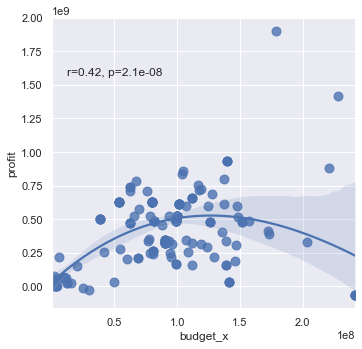

In [105]:
doc_df = imdb_movies[imdb_movies['Documentary'] == True]

sns.lmplot(data = imdb_movies[imdb_movies['Documentary'] == True], x = 'budget_x',
           y = 'profit', order = 3, scatter_kws={"s": 80})
r, p = sp.stats.pearsonr(doc_df['budget_x'], doc_df['revenue'])
ax = plt.gca()
ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
        transform=ax.transAxes);

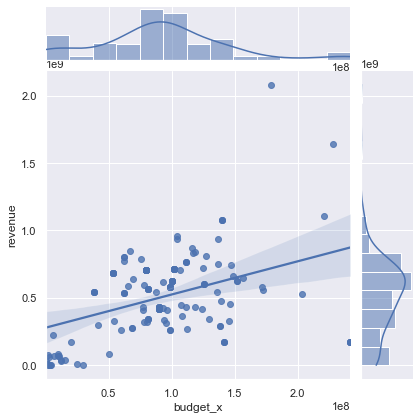

In [106]:
sns.jointplot(x="budget_x", y="revenue", data=imdb_movies[imdb_movies['Documentary'] == True], kind="reg");

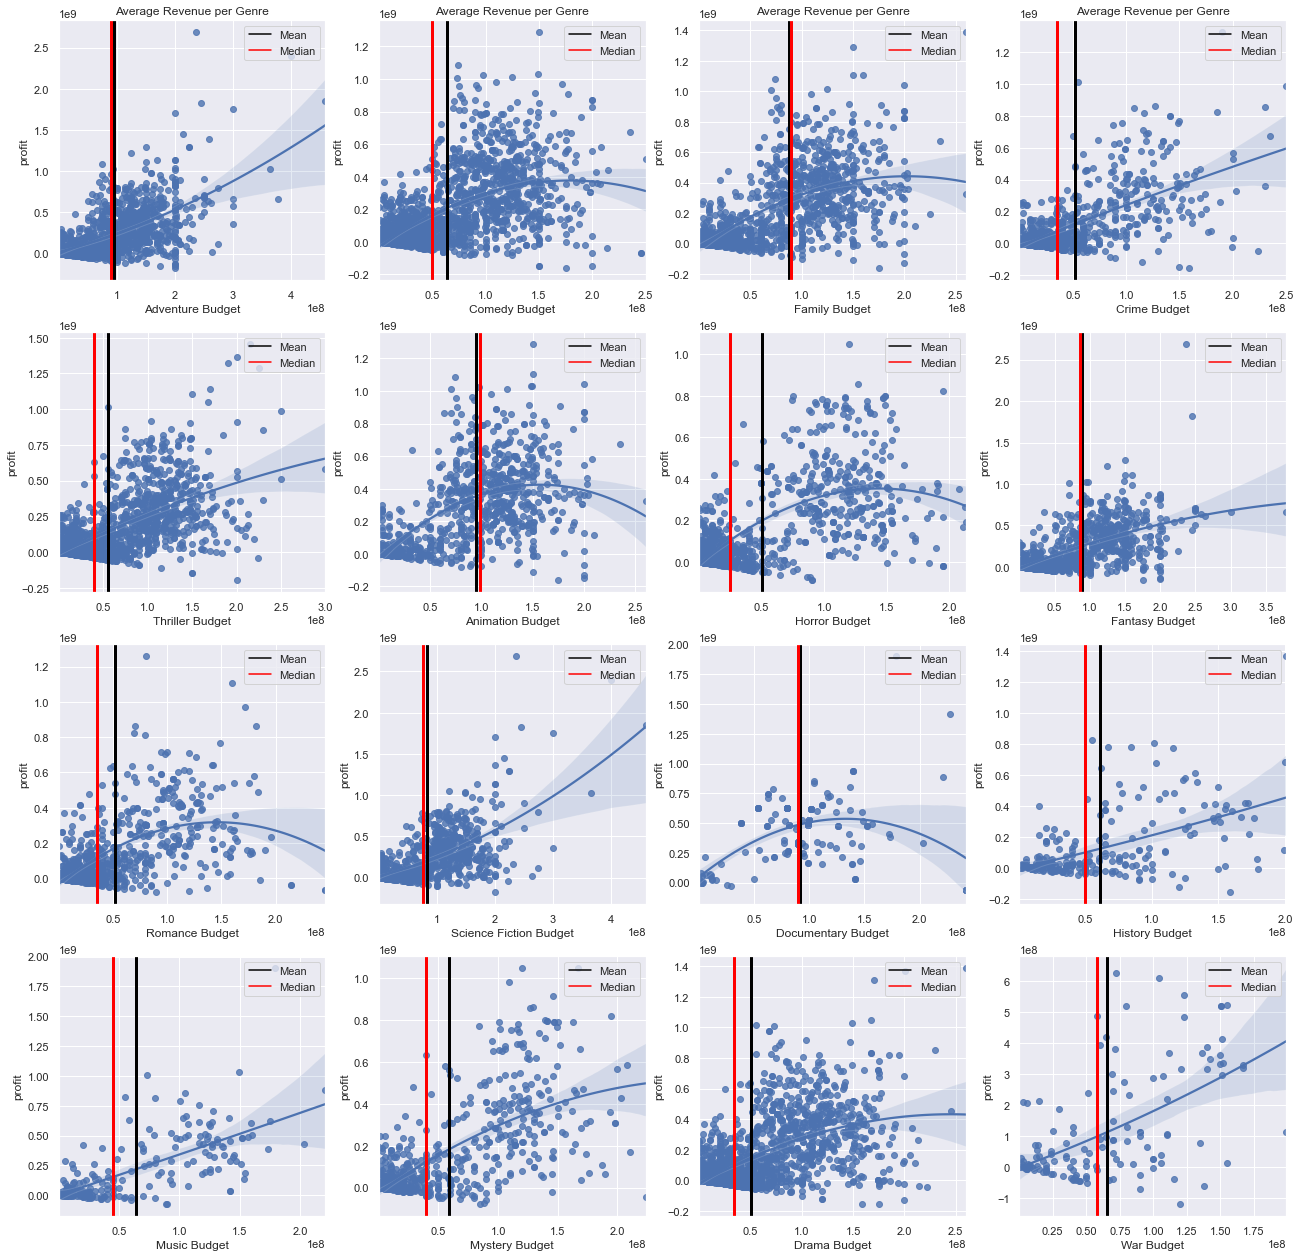

In [107]:
fig, axs = plt.subplots(4, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    sns.regplot(data = imdb_movies[imdb_movies[genre] == True], x = 'budget_x',y = 'profit', ax = axs[math.floor(x),y%4], order =2)
    axs[math.floor(x),y%4].set_xlabel(genre + ' Budget')
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['budget_x'].mean(), color = 'black', lw = 3)
    axs[math.floor(x),y%4].axvline(x = imdb_movies[imdb_movies[genre] == True]['budget_x'].median(), color = 'red', lw = 3)
    
    labels = ['Mean', 'Median']
    #axs[math.floor(x),y%4].legend(labels, loc='upper right')

    a = Line2D([], [], color='black', label='Mean')
    b = Line2D([], [], color='red', label='Median')
    axs[math.floor(x),y%4].legend(handles=[a, b], loc='upper right')

    if math.floor(x) == 0:
        axs[math.floor(x),y%4].set_title('Average Revenue per Genre')        
    y += 1
    x += .25
    
    from matplotlib.lines import Line2D;

From these we can see that the average and median budget of a documentary is roughly 9 million. Our regression models show that the ideal budget for producing a profitable documentary is between 10-15 Million.